## Homework - Machine Learning Preparation

**KELOMPOK 8**

***Anggota***
1. Stella Indranawaski
2. Aditya Noeleka
3. Septasia Dwi
4. Mario Marfelly
5. Arum Puspita Sari
6. Aprillia Ika

In [5]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [6]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ', np.__version__)
print('pandas version : ', pd.__version__)
print('seaborn version : ', sns.__version__)

numpy version :  1.20.3
pandas version :  1.3.4
seaborn version :  0.11.2


In [7]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Descriptive Statistics

## Load Data

In [8]:
# memanggil data

df_train_raw = pd.read_csv('train_FP.csv')
df_train_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Describe Data

In [9]:
# mengecek tipe data dan missing value disetiap kolom
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Dataset ini merupakan data asuransi kendaraan**

Kolom-kolom pada dataset berikut adalah:
* `id` : ID unik
* `Gender` : Jenis kelamin
* `Age` : Umur
* `Driving_License` : Nasabah yang memiliki surat izin mengemudi
0 : tidak punya, 1 : punya
* `Region_Code` : Kode area nasabah
* `Previously_Insured` : Nasabah yang memiliki asuransi kendaraan
0 : tidak punya, 1 : punya
* `Vehicle_Age` : Umur kendaraan
* `Vehicle_Damage` : Nasabah yang pernah mendapatkan masalah kendaraan rusak
0 : tidak pernah, 1 : pernah
* `Annual_Premium` : biaya yang dibayarkan nasabah dalam 1 tahun
* `Policy_Sales_Channel` : Kode dimana nasabah membuka polis asuransi kendaraan, contoh: melalui agen lain, surat, telepon, secara langsung, dll
* `Vintage` : Jangka waktu nasabah berlangganan asuransi kendaraan (satuan Hari)
* `Response` : Tanggapan nasabah yang tertarik dengan asuransi kendaraan
0: tidak tertarik, 1 : tertarik

**Insight**
* Target ada di kolom `Response` dengan keterangan:
    * 1 = tertarik
    * 0 = tidak tertarik
* Kolom yang lain adalah *feature*
* Dataset memiliki total 381109 baris dan 12 kolom
* Semua kolom tidak memiliki *missing value*
* Beberapa kolom kurang sesuai tipe datanya:
    * `Region_Code` : float > str
    * `Annual_Premium` : float > int
    * `Policy_Sales_Channel` : float > int

In [10]:
# cek nilai summary
df_train_raw.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Insight**
* Kolom `Annual_Premium` terlihat memiliki outliers (nilai max jauh dari Q3)
* Semua kolom memiliki perbedaan nilai mean dan median yang tidak signifikan sehingga tidak ada indikasi outlier atau skewed distribution

## Jawaban No.1 Descriptive Statistics

* A. Beberapa kolom kurang sesuai tipe datanya:
    * `Region_Code` : float > str
    * `Annual_Premium` : float > int
    * `Policy_Sales_Channel` : float > int
* B. Semua kolom pada dataset tidak ada nilai yang kosong/missing value
* C. 
-_ Kolom `Annual_Premium` terlihat memiliki outliers (nilai max jauh dari Q3)
-_ Semua kolom memiliki perbedaan nilai mean dan median yang tidak signifikan sehingga tidak ada indikasi outlier atau skewed distribution

# Univariate Analysis

## Duplicated Values

In [11]:
# menyalin dataset agar tidak mengubah dataset raw
df_train = df_train_raw.copy()

# mengetahui jumlah baris yang duplicated terhadap semua kolom
print('Jumlah baris duplicate: ', df_train.duplicated().sum())

# mengetahui jumlah baris yang duplicated terhadap semua kolom kecuali ID
print('Jumlah baris yang duplicated kecuali ID: ', df_train.duplicated(subset = df_train.columns[1:]).sum())

Jumlah baris duplicate:  0
Jumlah baris yang duplicated kecuali ID:  269


In [12]:
# identifikasi kolom numerical
cols_numerical = ['Age','Region_Code','Driving_License','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage','Response']

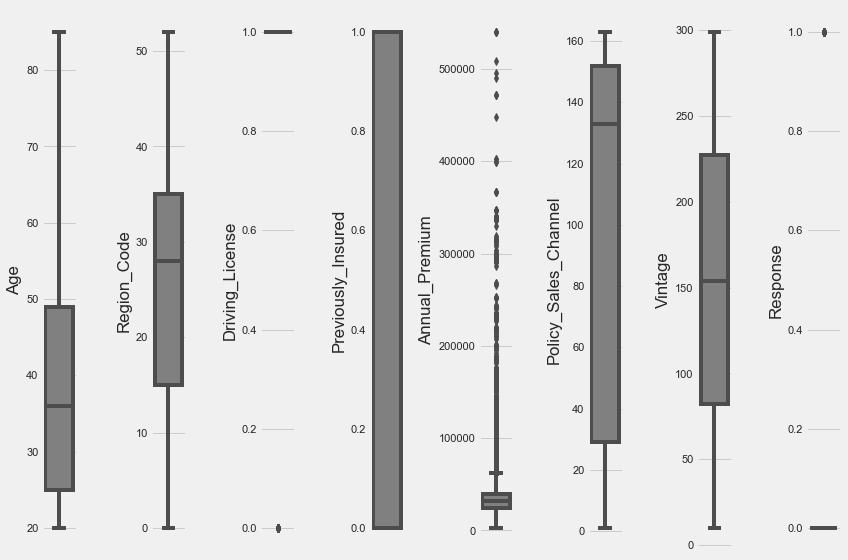

In [13]:
# boxplot untuk kolom numerikal
plt.figure(figsize=(12,8))
for i in range(0, len(cols_numerical)):
    plt.subplot(1, len(cols_numerical), i+1)
    sns.boxplot(y = df_train[cols_numerical[i]], color = 'grey', orient = 'v')
    plt.tight_layout()

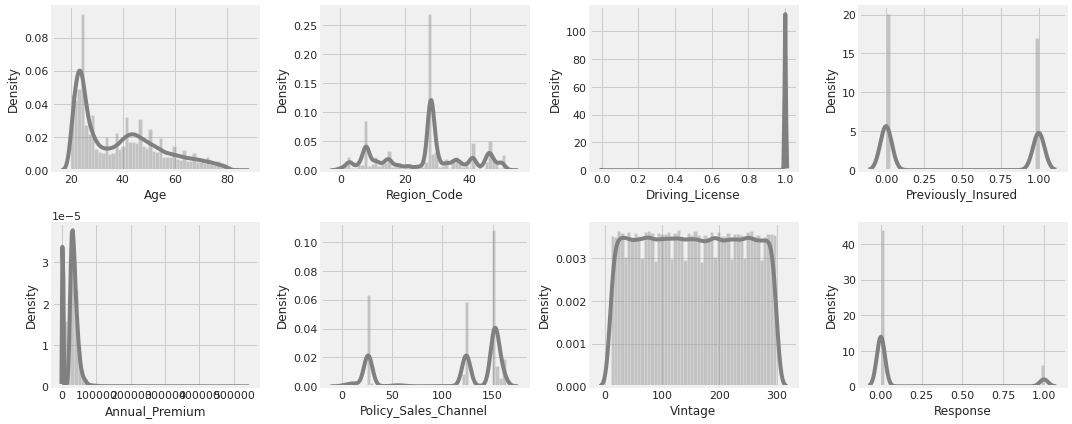

In [ ]:
# histogram untuk kolom numerikal
plt.figure(figsize=(15,6))
for i in range(0, len(cols_numerical)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df_raw[cols_numerical[i]], color = 'grey')
    plt.tight_layout()

**Insight**:
* Kolom `Annual_Premium` memiliki outliers
* Kolom `Age`, dan `Annual_Premium` memiliki distribusi yang skewed ke kanan (skewed positif)

In [ ]:
# identifikasi kolom kategorikal
cols_categorical = ['Gender','Vehicle_Age','Vehicle_Damage']

In [ ]:
df_train[cols_categorical].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


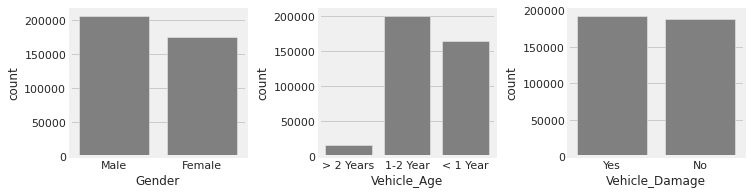

In [ ]:
# countplot kolom kategorikal
plt.figure(figsize=(14,5))
for i in range(0, len(cols_categorical)):
    plt.subplot(2, 4, i+1)
    sns.countplot(df_raw[cols_categorical[i]], color = 'grey', orient = 'v')
    plt.tight_layout()

**Insight**:
* Semua kolom memiliki jumlah unique value yang jelas

## Jawaban No.2 Univariate Analysis

* Jumlah baris duplicate (include ID) = 0
* Jumlah baris yang duplicated (exclude ID) = 269
* Kolom `Annual_Premium` memiliki outliers
* Kolom `Age`, dan `Annual_Premium` memiliki distribusi yang skewed ke kanan (skewed positif)
* Kolom `Vintage` memiliki distribusi normal
* Semua kolom kategorikal `Gender`, `Vehicle_Age`, dan `Vehicle_Damage` memiliki value yang jelas dan tidak banyak value yang variatif 

* Yang harus difollow-up saat data preprocessing adalah :
1. Pada kolom 'Annual_Premium' yang menunjukkan adanya outlier, penanganan adanya outlier tersebut sebaiknya adalah perlu hati-hati atau lebih konservatif terhadap kolom 'Annual_Premium' tersebut. Karena penanganan outlier yang baik adalah tidak terburu-buru untuk melakukan handling dengan menghapus data apabila boxplot menunjukkkan adanya outlier.
2. Pada kolom 'Age' dan 'Annual _Premium' yang distribusinya skewed ke kanan, penanganan yang dapat dilakukan yaitu dimungkinkan menggunakan logaritma transformasi.

# Multivariate Analysis

## Heatmap Correlation

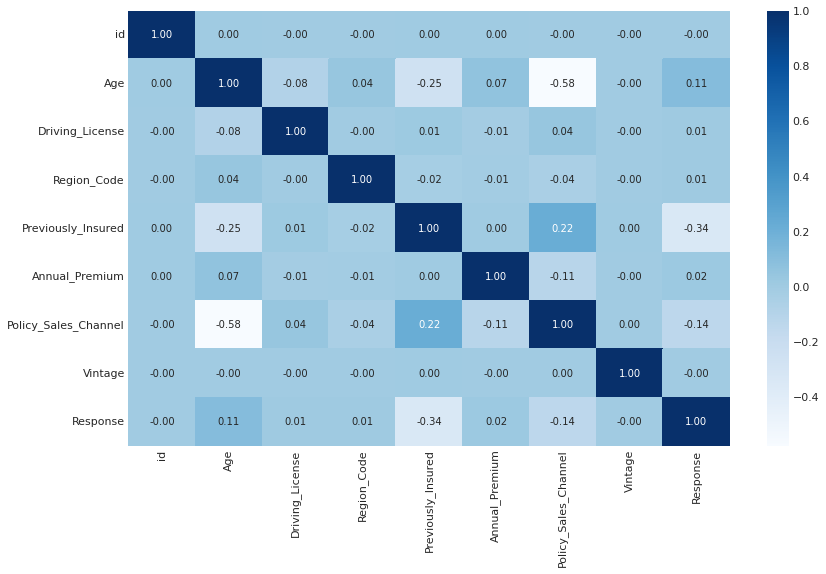

In [ ]:
# membuat heatmap correlation dengan data raw
plt.figure(figsize = (12, 8))
sns.heatmap(df_train.corr(), cmap = 'Blues', annot = True, fmt = '.2f')

 **Insight**:
 * Target output yaitu `Response` sebagai variabel target / variabel dependent karena variabel `Response`adalah hasil prediksi dari variabel bebas lainnya dan hasilnya akan selalu berubah menyesuaikan variabel bebas
 * Tidak ada korelasi yang kuat antara target `Response` dengan masing-masing feature yang ada
 * Kemungkinan besar tidak ada data yang redundant (>0.7)

**Korelasi hasil heatmap**

 * Kolom `Policy_Sales_Channel` dengan `Age` memiliki korelasi kuat negatif
 * Kolom `Previously_Insured` dengan `Response` memiliki korelasi kuat negatif
 * Kolom `Age`, `Response`, dan `Annual_Premium` memiliki korelasi kuat positif
 * Kolom `Previously_Insured` dengan `Age` memiliki korelasi kuat negatif
 * Kolom `Policy_Sales_Channel` dengan `Previously_Insured` memiliki korelasi kuat positif

## Pair Plots

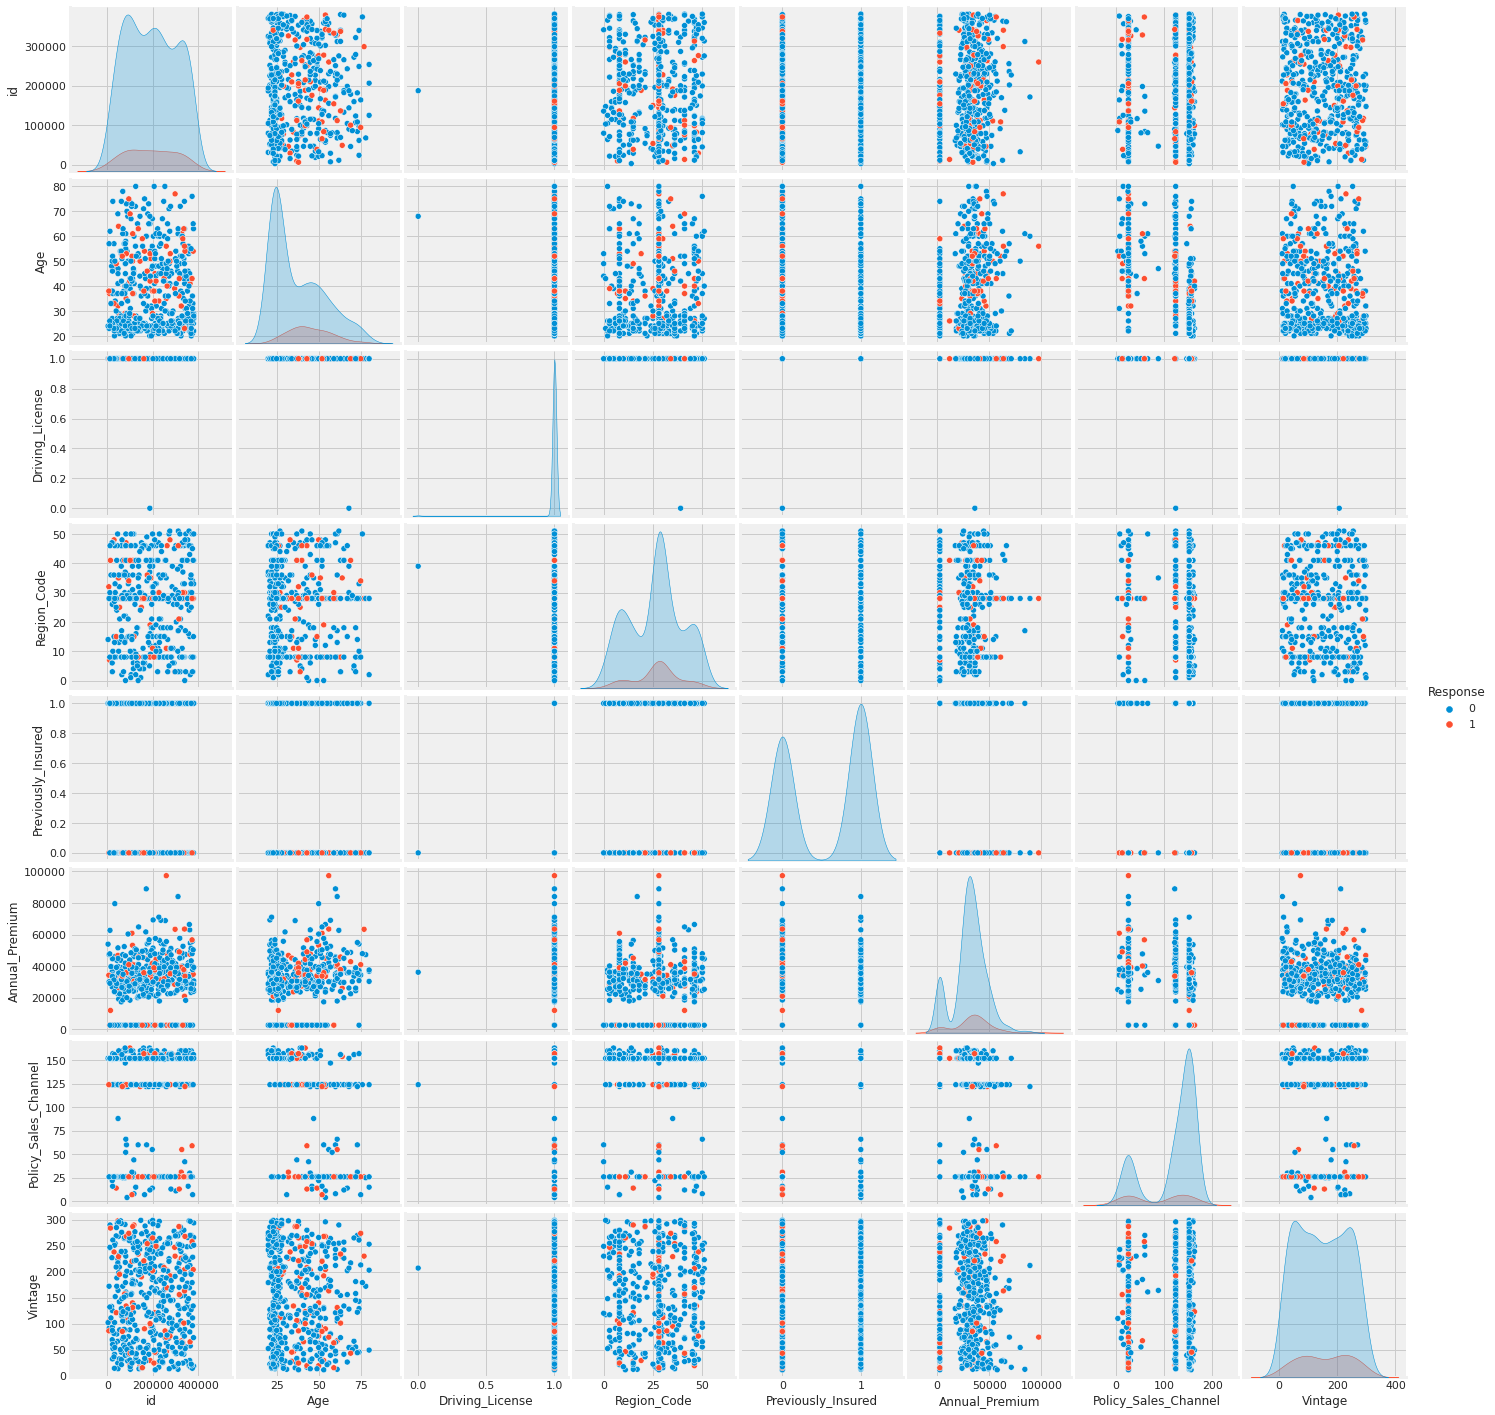

In [ ]:
# Membuat pairplot dengan sample data 500
sns.pairplot(df_train.sample(500), diag_kind='kde',hue = 'Response')

## Category Plots

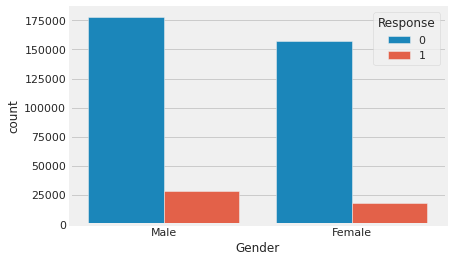

In [ ]:
sns.countplot(data=df_train,x='Gender',hue='Response')

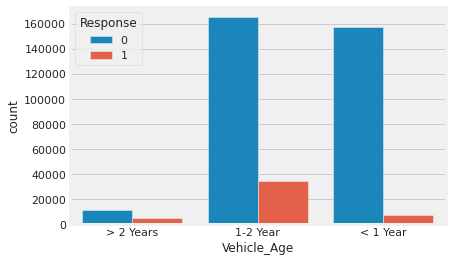

In [ ]:
sns.countplot(data=df_train,x='Vehicle_Age',hue='Response')

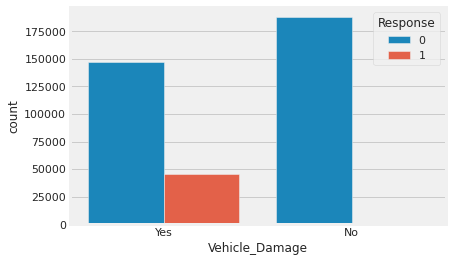

In [ ]:
sns.countplot(data=df_train,x='Vehicle_Damage',hue='Response')

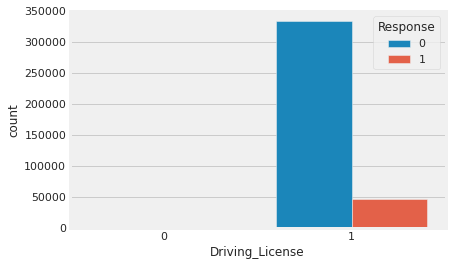

In [ ]:
sns.countplot(data=df_train,x='Driving_License',hue='Response')

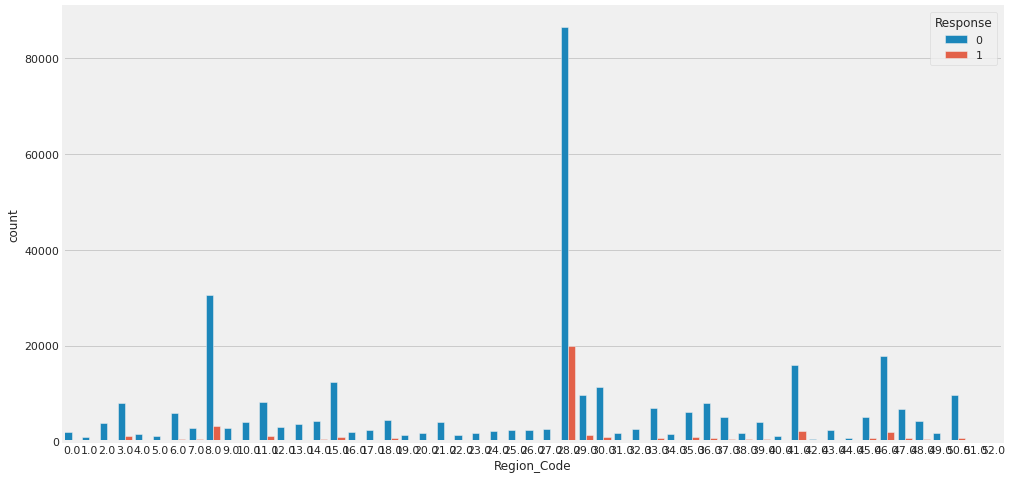

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_train,x='Region_Code',hue='Response')

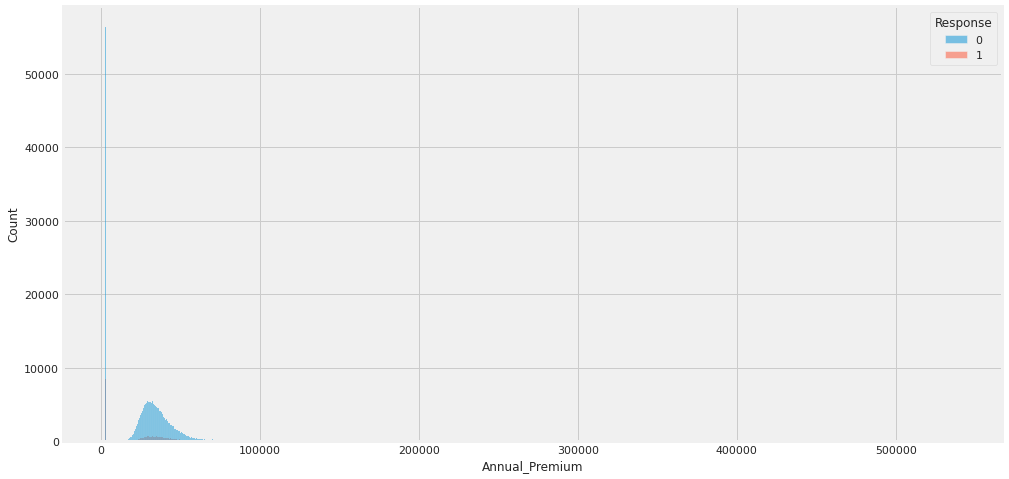

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=df_train,x='Annual_Premium',hue='Response')

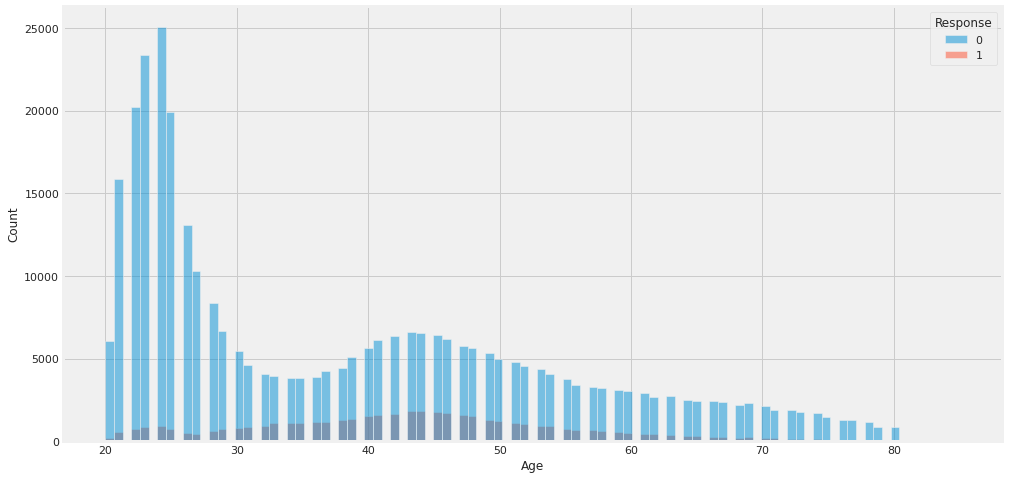

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=df_train,x='Age',hue='Response')

## Categorical vs Target

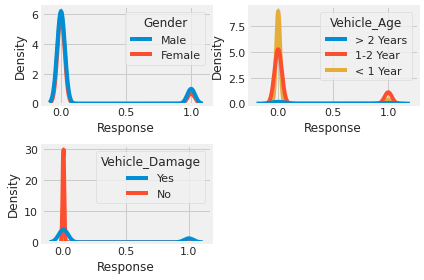

In [ ]:
# melihat hubungan fitur-fitur kategorikal dengan calon target pemodelan (Response)
features = cols_categorical
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.kdeplot(data=df_train, x='Response', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout()

**Insight**:
* Semua gender memiliki response yang sama banyaknya
* Umur kendaraan yang < 1 tahun cenderung tidak tertarik memiliki asuransi kendaraan
* Kendaraan yang pernah tidak pernah mengalami kerusakan, cenderung tidak membeli asuransi kendaraan

## Jawaban No.3 Multivariate Analysis

 A. Korelasi antar feature
 * Kolom `Policy_Sales_Channel` dengan `Age` memiliki korelasi kuat negatif
 * Kolom `Previously_Insured` dengan `Response` memiliki korelasi kuat negatif
 * Kolom `Age`, `Response`,  dan `Annual_Premium` memiliki korelasi kuat positif
 * Kolom `Previously_Insured` dengan `Age` memiliki korelasi kuat negatif
 * Kolom `Policy_Sales_Channel` dengan `Previously_Insured` memiliki korelasi kuat positif

 Feature yang paling relevan dan harus dipertahankan adalah 
 1. `Age`
 2. `Previously_Insured`
 3. `Policy_Sales_Channel`
 4. `Annual_Premium`
 5. `Driving_License`

B. Pola menarik

  *  Tidak ada korelasi yang kuat antara target `Response` dengan masing-masing feature yang ada
  * Terdapat pola yang menarik dari beberapa feature sehingga perlu dilakukan pembuktian lebih lanjut seperti feature `Age` dan `Driving_License` karena memiliki korelasi yang lemah
  * Kemungkinan besar tidak ada data yang redundant (>0.7)
 

## Jawaban No.4 Business Insight

 * Semua gender memiliki response yang sama banyaknya
  * Umur kendaraan yang < 1 tahun cenderung tidak tertarik memiliki asuransi kendaraan
  * Kendaraan yang pernah tidak pernah mengalami kerusakan, cenderung tidak membeli asuransi kendaraan
  * Jumlah response tertinggi berada di Region Code = 28, sehingga next bisa digunakan sebagai target marketing berdasarkan region


## Missing Data

In [14]:
df_train_raw.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Tidak ada data yang hilang untuk setiap category

In [18]:
# menyalin dataset agar tidak mengubah dataset raw
df_train = df_train_raw.copy()

# mengetahui jumlah baris yang duplicated terhadap semua kolom
print('Jumlah baris duplicate: ', df_train.duplicated().sum())

# mengetahui jumlah baris yang duplicated terhadap semua kolom kecuali ID
print('Jumlah baris yang duplicated dengan Subset ID: ', df_train.duplicated(subset = df_train.columns[1:]).sum())

Jumlah baris duplicate:  0
Jumlah baris yang duplicated dengan Subset ID:  269


Duplikat data untuk semua kolom : 0
Duplikat data dengan Subset ['ID'] terdapat 269. Bisa kemungkinan ID Duplikat karena terdapat nasabah dengan ID sama melakukan transaksi lebih dari 1 kali (Apakah tetap diperlukan untuk nasabah dengan transaksi yg sama tersebut?)

In [22]:
df_train = df_train.drop_duplicates(subset = df_train.columns[1:])
df_train = df_train.drop_duplicates (keep = 'first')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380840 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    380840 non-null  int64  
 1   Gender                380840 non-null  object 
 2   Age                   380840 non-null  int64  
 3   Driving_License       380840 non-null  int64  
 4   Region_Code           380840 non-null  float64
 5   Previously_Insured    380840 non-null  int64  
 6   Vehicle_Age           380840 non-null  object 
 7   Vehicle_Damage        380840 non-null  object 
 8   Annual_Premium        380840 non-null  float64
 9   Policy_Sales_Channel  380840 non-null  float64
 10  Vintage               380840 non-null  int64  
 11  Response              380840 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.8+ MB


Ketika menghilangkan duplikat data dengan subset nasabah, data yang tersisa sebanyak 30840

## Menghapus Outlier

In [34]:
# Menghapus Outlier berdasarkan IQR
print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')

for col in ['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']:
  Q1 = df_train[col].quantile(0.25)
  Q3 = df_train[col].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  df_train = df_train[(df_train[col] >= low_limit) & (df_train[col] <= high_limit)]

print(f'Jumlah baris setelah memfilter outlier: {len(df_train)}')

Jumlah baris sebelum memfilter outlier: 370499
Jumlah baris setelah memfilter outlier: 368973


In [32]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,370499.00000,370499.000000,370499.000000,370499.000000,370499.000000,370499.000000,370499.000000,370499.000000,370499.000000
mean,190489.99417,38.669789,0.997943,26.436581,0.459667,29282.987574,112.540771,154.342873,0.121809
std,110035.10095,15.439925,0.045304,13.310512,0.498371,14730.047800,54.041164,83.669084,0.327065
min,1.00000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95168.50000,25.000000,1.000000,15.000000,0.000000,24127.000000,30.000000,82.000000,0.000000
50%,190473.00000,36.000000,1.000000,28.000000,0.000000,31329.000000,151.000000,154.000000,0.000000
75%,285763.50000,49.000000,1.000000,36.000000,1.000000,38602.000000,152.000000,227.000000,0.000000
max,381109.00000,84.000000,1.000000,52.000000,1.000000,61881.000000,163.000000,299.000000,1.000000


In [35]:
# Menghapus Outlier berdasarkan Z-Score
from scipy import stats
z_scores = np.abs(stats.zscore(df_train['Age']))
filtered_entries = (z_scores < 3)
df_train_age = df_train[filtered_entries]
df_train_age

z_scores = np.abs(stats.zscore(df_train['Region_Code']))
filtered_entries = (z_scores < 3)
df_train_rc = df_train[filtered_entries]
df_train_rc

z_scores = np.abs(stats.zscore(df_train['Annual_Premium']))
filtered_entries = (z_scores < 3)
df_train_ap = df_train[filtered_entries]
df_train_ap

z_scores = np.abs(stats.zscore(df_train['Policy_Sales_Channel']))
filtered_entries = (z_scores < 3)
df_train_psc = df_train[filtered_entries]
df_train_psc

z_scores = np.abs(stats.zscore(df_train['Vintage']))
filtered_entries = (z_scores < 3)
df_train_vintage = df_train[filtered_entries]
df_train_vintage

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [36]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,368973.000000,368973.000000,368973.000000,368973.000000,368973.000000,368973.000000,368973.000000,368973.000000,368973.000000
mean,190501.058302,38.643508,0.997962,26.441320,0.459960,29151.573877,112.623327,154.327035,0.121646
std,110031.335916,15.425764,0.045099,13.322904,0.498395,14617.724758,54.013109,83.663540,0.326877
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95183.000000,25.000000,1.000000,15.000000,0.000000,24082.000000,30.000000,82.000000,0.000000
50%,190500.000000,36.000000,1.000000,28.000000,0.000000,31274.000000,151.000000,154.000000,0.000000
75%,285768.000000,49.000000,1.000000,36.000000,1.000000,38489.000000,152.000000,227.000000,0.000000
max,381109.000000,84.000000,1.000000,52.000000,1.000000,60314.000000,163.000000,299.000000,1.000000


## Feature Transformation

In [ ]:
#Normalization/Standardization
from.sklearn.preprocessing import MinMaxScaler, StandardScaler
df_train


## Class Imbalance

In [43]:
df_train['train_class']= df_train ['Age'] > 36
print(df_train['train_class'].value_counts())

False    187362
True     181611
Name: train_class, dtype: int64


In [44]:
x = df_train[[col for col in df_train.columns if col not in ['train_class','Age']]].values
y = df_train['train_class'].values
print(x.shape)
print(y.shape)

(368973, 11)
(368973,)


In [45]:
df_train['train_class']= df_train ['Annual_Premium'] > 31274
print(df_train['train_class'].value_counts())

False    184489
True     184484
Name: train_class, dtype: int64


In [46]:
x = df_train[[col for col in df_train.columns if col not in ['train_class','Annual_Premium']]].values
y = df_train['train_class'].values
print(x.shape)
print(y.shape)

(368973, 11)
(368973,)


In [59]:
#Kalau Run imblearn 'no module named' install salah satu ini dulu

pip install -U imbalanced-learn
pip install imblearn
!pip install imblearn
pip install -c glemaitre imbalanced-learn
pip install imblearn==0.0

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

X_under, y_under = under.sampling.RandomUnderSampler(0.5).fit_resample(X,y)
X_over, y_over = over.sampling.RandomOverrSampler(0.5).fit_resample(X,y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X,y)

Print(pd.series(y).value_counts())
Print(pd.series(y_over).value_counts())
Print(pd.series(y_under).value_counts())